In [281]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../aeroComputing/lib/")
import pyvot

In [282]:
# set up knowns
Mi = 0.3
po = 1400000
pe = 100000
y = 1.4
R = 287
mdot = 3
To = 200+273.15

In [283]:
# get inlet static pressure
pi = po/(1+(y-1)/2*Mi**2)**(y/(y-1))

# get throat static pressure
pstar = po*(2/(y+1))**(y/(y-1))

# set up range of vals
p1s = np.arange(pi, pe, -50000)

In [284]:
# get Astar
Astar = mdot/((po/np.sqrt(R*To))*np.sqrt(y)*(1+(y-1)/2)**((y+1)/(2*(1-y))))

In [285]:
# get prat at each point
prat = [po/p1 for p1 in p1s]

# get mach at each point along pressure range
Ms = [np.sqrt((2*(pra**((y-1)/y) - 1))/(y-1)) for pra in prat]

# calculate the area at each point
As = [Astar/M*((1+(y-1)/2*(M**2))/((y+1)/2))**((y+1)/(2*(y-1))) if M>0 else 0 for M in Ms]

In [286]:
# find area at inlet
Ai = Astar/Mi*((1+(y-1)/2*(Mi**2))/((y+1)/2))**((y+1)/(2*(y-1)))

# find area at exit
Me = np.sqrt((2*((po/pe)**((y-1)/y) - 1))/(y-1))
Ae = Astar/Me*((1+(y-1)/2*(Me**2))/((y+1)/2))**((y+1)/(2*(y-1)))

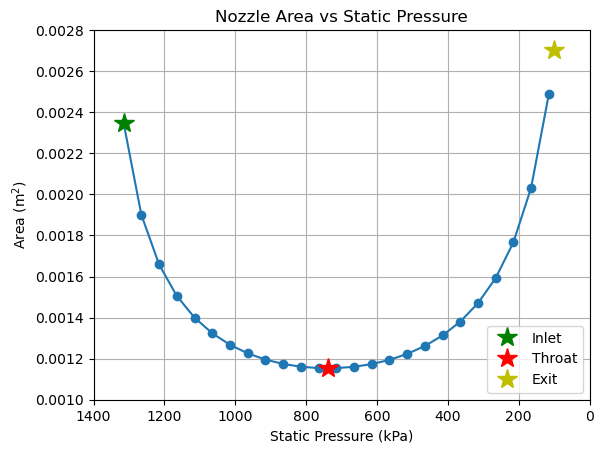

In [290]:
# plot area
plt.plot(p1s/1000, As, "-o")
plt.plot(pi/1000, Ai, "g*", markersize="15", label="Inlet")
plt.plot(pstar/1000, Astar, "r*", markersize="15", label="Throat")
plt.plot(pe/1000, Ae, "y*", markersize="15", label="Exit")
plt.gca().invert_xaxis()
plt.xlim([1400, 0])
plt.ylim([0.0010, 0.0028])
plt.legend(loc="lower right")
plt.grid()
plt.xlabel("Static Pressure (kPa)")
plt.ylabel("Area (m$^2$)")
plt.title("Nozzle Area vs Static Pressure")
plt.show()

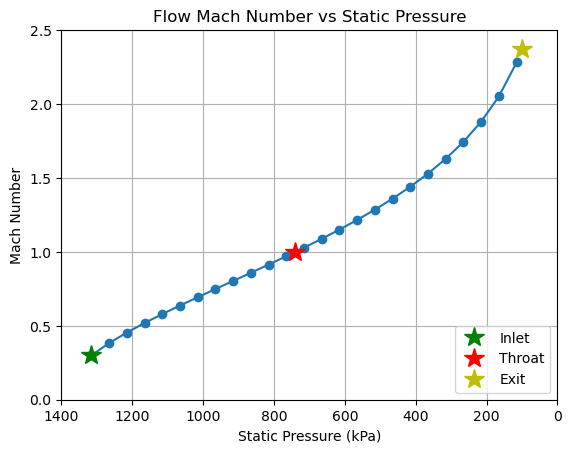

In [293]:
# plot machs
plt.plot(p1s/1000, Ms, "-o")
plt.plot(pi/1000, Mi, "g*", markersize="15", label="Inlet")
plt.plot(pstar/1000, 1, "r*", markersize="15", label="Throat")
plt.plot(pe/1000, Me, "y*", markersize="15", label="Exit")
plt.gca().invert_xaxis()
plt.xlim([1400, 0])
plt.ylim([0, 2.5])
plt.grid()
plt.legend(loc="lower right")
plt.xlabel("Static Pressure (kPa)")
plt.ylabel("Mach Number")
plt.title("Flow Mach Number vs Static Pressure")
plt.show()

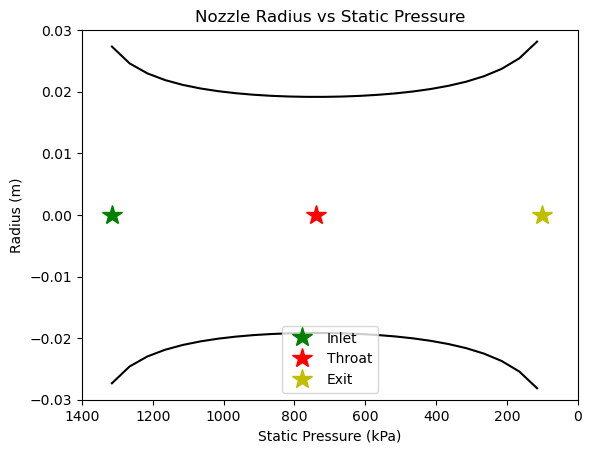

In [311]:
# find radius
r = [np.sqrt(A/np.pi) for A in As]
ra = [-1*r for r in r]

# plot radii
plt.plot(p1s/1000, r, color="black")
plt.plot(p1s/1000, ra, color="black")
plt.xlabel("Static Pressure (kPa)")
plt.ylabel("Radius (m)")
plt.ylim([-.03, .03])
plt.xlim([1400, 0])
plt.title("Nozzle Radius vs Static Pressure")
plt.plot(pi/1000, 0, "g*", markersize="15", label="Inlet")
plt.plot(pstar/1000, 0, "r*", markersize="15", label="Throat")
plt.plot(pe/1000, 0, "y*", markersize="15", label="Exit")
plt.legend(loc="lower center")
plt.show()